In [1]:
from sweep_utils import * 

In [2]:
param_configs = "../param_configs/attn_fista_rho_mu_sweep_20it_prior_mv.json"
script_name = "../scripts/run_fineweb1B_adamw_classic_fista_momentum_l1.sh"
df, missing = load_sweep_jsons(param_configs, script_name)

Some files are missing: 
{'attn_fista_adamw-lr-0.001-warm-up-cosine-5d9b633de2eaca53fc09b84d985d2e41.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-2d32c1846dd6d5bdbeb72ecdae627738.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-cd7faace7bde00ae4538504d6d7d5ff3.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-17c290f561529ec3de2c76553ac85ec0.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-7c7cd96f32d6a0861bff986b09ba268f.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-ca0f539a0c4723d745a8f9d6861f51e7.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-1ee4d988fb7c826c87322f92f8ca6d44.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-3fa292bc58bf32b0c37ebc4098d70dab.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-aedd4f8dbd19c6ef3a0272e1ad51f86b.json', 'attn_fista_adamw-lr-0.001-warm-up-cosine-87086ab3807c39d50e7cdcb32e318c19.json'}
{'attn_max_iter': '20', 'attn_momentum': 'prior_mv', 'lr': '0.001', 'momentum': 'False', 'mu_frac': '0.1', 'rho_over_lr': '100', 'warm_start': 'False'}
{'

In [3]:
df[:5]

,path,final_train_loss,min_val_loss,fin_val_loss,kq_max,kq_median,kq_mean,attn_max_iter,attn_momentum,lr,momentum,mu_frac,rho_over_lr,warm_start
0,/mnt/home/tparshakova/Documents/GPT-opt/output...,8.021416,7.802665,8.021649,3604480.0,2056192.0,2.001060e+06,20,prior_mv,0.001,False,0.1,50,False
1,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.785753,7.720110,7.783189,1540096.0,528384.0,6.377142e+05,20,prior_mv,0.001,False,0.05,10,False
2,/mnt/home/tparshakova/Documents/GPT-opt/output...,10.280268,10.037409,10.274351,7831552.0,2441216.0,3.231484e+06,20,prior_mv,0.001,False,0.05,50,False
3,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.705451,7.331194,7.701233,67584.0,33536.0,3.467522e+04,20,prior_mv,0.001,False,0.5,10,False
4,/mnt/home/tparshakova/Documents/GPT-opt/output...,7.889756,7.886631,7.886631,1073152.0,462848.0,5.071979e+05,20,prior_mv,0.001,False,0.005,1,False


In [4]:
sorted(df["mu_frac"].unique()), sorted(df["rho_over_lr"].unique())

(['0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '0.75'],
 ['0.01', '0.1', '0.5', '1', '10', '5', '50'])

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


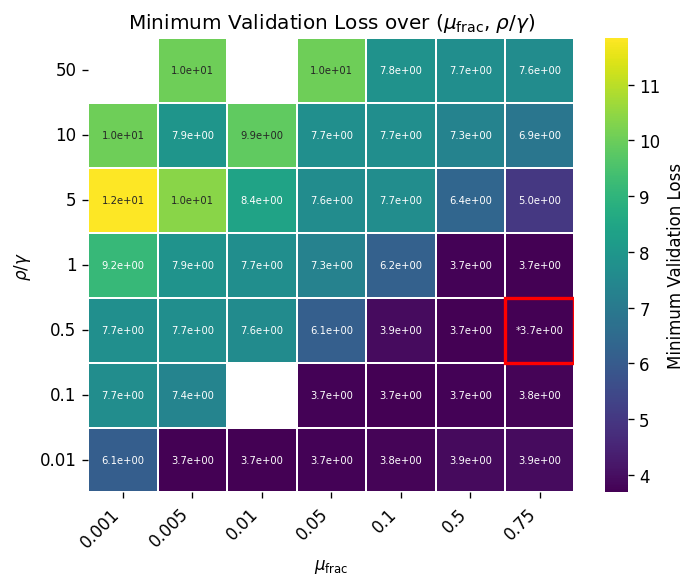

In [5]:
plot_heatmat_grid(df, value="min_val_loss")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


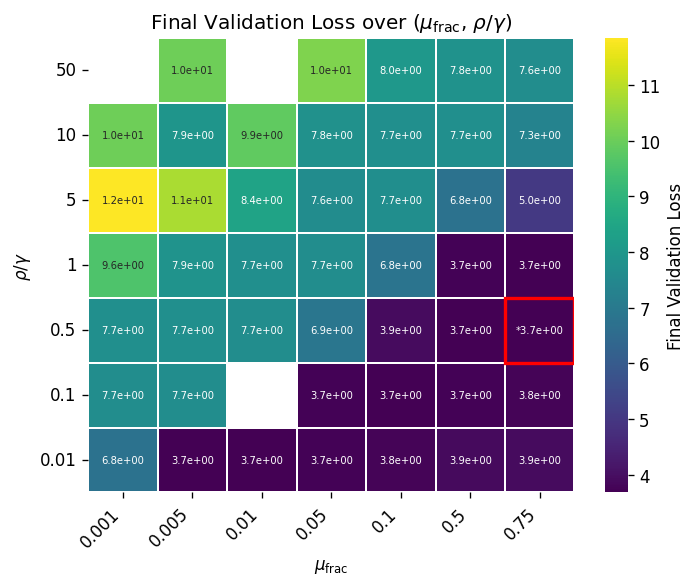

In [6]:
plot_heatmat_grid(df, value="fin_val_loss")

In [7]:
cols = ["min_val_loss", "kq_max", "mu_frac", "rho_over_lr"]
top10 = df.dropna(subset=cols).nsmallest(10, "min_val_loss")[cols].reset_index(drop=True)
print(top10)

   min_val_loss  kq_max mu_frac rho_over_lr
0      3.684375   89.50    0.75         0.5
1      3.702690  422.00   0.005        0.01
2      3.708333  111.50     0.1         0.1
3      3.709580  114.50    0.01        0.01
4      3.710322  142.00     0.5         0.5
5      3.712543  255.00    0.75           1
6      3.720499  564.00    0.05         0.1
7      3.722169   51.25     0.5         0.1
8      3.728684   43.00    0.05        0.01
9      3.731790  860.00     0.5           1


/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


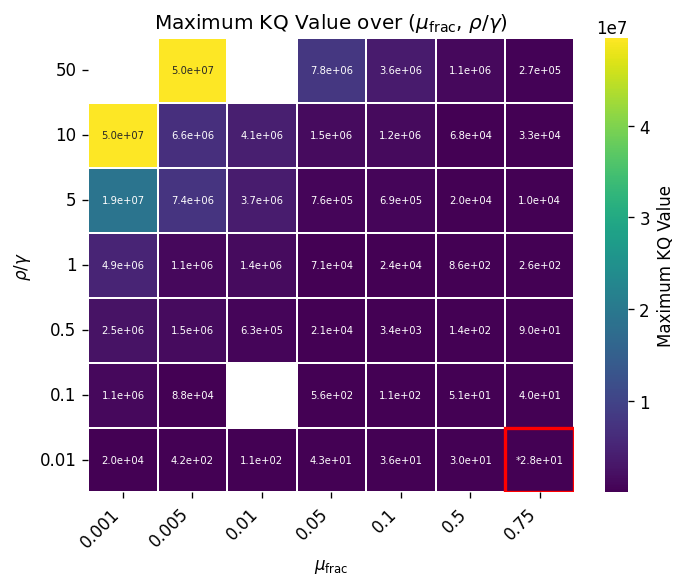

In [8]:
plot_heatmat_grid(df, value="kq_max")

/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:777: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot.applymap(lambda v: "" if pd.isna(v) else fmt.format(float(v)))
/mnt/home/tparshakova/Documents/GPT-opt/sweeps/sweep_utils.py:779: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  s = pivot.stack(dropna=True)


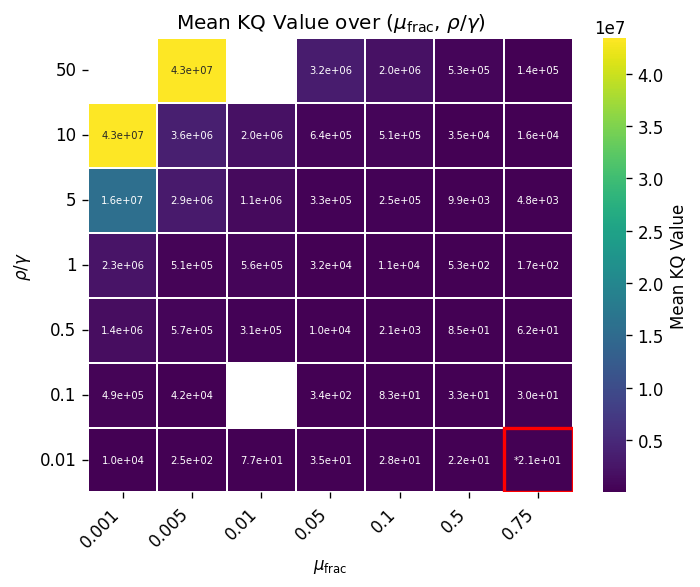

In [9]:
plot_heatmat_grid(df, value="kq_mean")